In [7]:
# S&P 500 COMPANIES: SECTOR, LOCATION, AND DIVERSITY ANALYSIS

import pandas as pd     # first we need to import the pandas library for data manipulation

# here we're scraping the S&P 500 companies from Wikipedia
try:
    scraper = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    print(scraper)

except Exception as e:
    print(f"An error occurred: {e}")  

# for i, table in enumerate(scraper):
#     print("-----")
#     print(i)
#     print(table)

# scraper[0]

# this shows the first table.. even though there's only one table (just practice)
df = scraper[0]     # df = dataframe

df.to_csv("sp500.csv", index=False)  # save the DataFrame to a CSV file, set standard index to False

df_scraped_file = pd.read_csv("sp500.csv")  # read the CSV file into a DataFrame
df_scraped_file

[    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [8]:
import pandas as pd     # import pandas library for data manipulation

# we don't have to scrape the site again, because it saves in the Jupyter Notebook directory so we can just read the CSV file directly
# do try and except to handle the case where the file might not exist (this is generally good practice for handling errors)
try:
    df_scraped_file = pd.read_csv("sp500.csv") 
    print("DataFrame loaded successfully from sp500.csv")
except FileNotFoundError:
    print("File not found. Please ensure that sp500.csv exists in the current directory.")
    exit() # we exit if the file is not found

print("\nDataframe Information:")
print(df.info())   # displays information about the DataFrame

print("\nFirst 5 rows of the DataFrame:")
print(df.head())   # displays the first 5 rows of the DataFrame to check if everything loaded correctly

print("\nColumn Names:")
print(df.columns.tolist())  # prints the names of the columns in the DataFrame


DataFrame loaded successfully from sp500.csv

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB
None

First 5 rows of the DataFrame:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3

In [9]:
#  --- CLEANING UP COLUMN NAMES ---
# I'm using the chaining method for better readability
# using the parenthesis method allows to continue a long line of code without breaking the chain
# regex is short for regular expressions, which defines a search pattern; in this case, it's set to False

df.columns = (df.columns
                    .str.strip()    # remove any leading or trailing whitespace from column names
                     .str.replace('\n', '', regex=False) # remove newline characters from column names
                     .str.replace('-', '_', regex=False) # replace hyphens with underscores in column names
                     .str.replace(' ', '_', regex=False) # replace spaces with underscores in column names
                     .str.lower()) # convert column names to lowercase for consistency

print("\nCleaned Column Names:")
print(df.columns.tolist()) # checking the new column names


# --- CLEANING DATA WITHIN SPECIFIC COLUMNS -----
# we're using the new and cleaned column names here
columns_to_clean = [
    'security',                 # 'security' is the name of the company
    'symbol',                   # 'symbol' is the stock ticker symbol
    'gics_sector',              # 'gics_sector' is the Global Industry Classification Standard sector
    'gics_sub_industry',        # 'gics_sub_industry' is the sub-industry classification
    'headquarters_location'     # 'headquarters_location' is the location of the company's headquarters
]

for col_name in columns_to_clean:
    print(f"Cleaning column: {col_name}")

    # for each column in the list, we will clean it up by removing citations, whitespace, and converting 'nan' strings to actual NaN values
    # we check if the column exists in the DataFrame before attempting to clean it (helps to avoid errors)
    if col_name in df.columns:
        df[col_name] = (df[col_name]
                    .astype(str)     # convert to string
                
                    .str.replace(r'\[.*?\]', '', regex=True)     # remove [citations]; this means "find a literal opening square bracket, followed by any characters 
                                                                    # (zero or more times, but as few as possible), followed by a literal closing square bracket"

                    .str.strip()                 # remove whitespace
                    .replace('nan', pd.NA))     # fix string 'nan' back to actual NaN (NaN = not a number)
    else:
        print(f"Warning: Column '{col_name}' not found for data cleaning.")

print("\nDataFrame after basic data cleaning (first 5 rows): ")
print(df.head())





Cleaned Column Names:
['symbol', 'security', 'gics_sector', 'gics_sub_industry', 'headquarters_location', 'date_added', 'cik', 'founded']
Cleaning column: security
Cleaning column: symbol
Cleaning column: gics_sector
Cleaning column: gics_sub_industry
Cleaning column: headquarters_location

DataFrame after basic data cleaning (first 5 rows): 
  symbol             security             gics_sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                gics_sub_industry    headquarters_location  date_added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3              

In [10]:
import pandas as pd     # import pandas library for data manipulation

import numpy as np      # import numpy library for numerical operations
# NumPy = Numerical Python, a library for for scientific computing with Python
# provides fast, efficient array operations and mathematical operations

# --- SPLITTING HEADQUARTERS LOCATION (ONELINER) INTO CITY AND STATE ---
def split_headquarters_oneliner(df):
    clean_location = df['headquarters_location'].fillna('').astype(str)     # this is taking the column 'headquarters_location', filling NaN values with an empty string, converting it to string type
    split_cols = clean_location.str.rsplit(',', n=1, expand=True)           # right splits the string at the last comma, perform at most one split, and expands the result into separate columns 
                                                                            # if Expand = false it would return a Series where each element is a list of the split parts    
    df['headquarters_city'] = split_cols[0].str.strip()
    df['headquarters_state'] = split_cols[1].str.strip().fillna('') if split_cols.shape[1] > 1 else ''
    
    # handles cases where a state could be empty after stripping
    df['headquarters_state'] = df['headquarters_state'].replace('', 'Uknown')

    return df

# apply the optimized function
df = split_headquarters_oneliner(df)

# display results
print("DataFrame after splitting headquarters location:")
print(df[['security','symbol', 'gics_sector', 'gics_sub_industry','headquarters_location', 'headquarters_city', 'headquarters_state']].head())

print("\nUnique states found (top 10):")
print(df['headquarters_state'].value_counts().head(10))


DataFrame after splitting headquarters location:
              security symbol             gics_sector  \
0                   3M    MMM             Industrials   
1          A. O. Smith    AOS             Industrials   
2  Abbott Laboratories    ABT             Health Care   
3               AbbVie   ABBV             Health Care   
4            Accenture    ACN  Information Technology   

                gics_sub_industry    headquarters_location headquarters_city  \
0        Industrial Conglomerates    Saint Paul, Minnesota        Saint Paul   
1               Building Products     Milwaukee, Wisconsin         Milwaukee   
2           Health Care Equipment  North Chicago, Illinois     North Chicago   
3                   Biotechnology  North Chicago, Illinois     North Chicago   
4  IT Consulting & Other Services          Dublin, Ireland            Dublin   

  headquarters_state  
0          Minnesota  
1          Wisconsin  
2           Illinois  
3           Illinois  
4           

GICS Sector Distribution:
                        Count  Percentage
gics_sector                              
Industrials                78       15.51
Financials                 74       14.71
Information Technology     68       13.52
Health Care                60       11.93
Consumer Discretionary     51       10.14
Consumer Staples           38        7.55
Utilities                  31        6.16
Real Estate                31        6.16
Materials                  26        5.17
Communication Services     24        4.77
Energy                     22        4.37


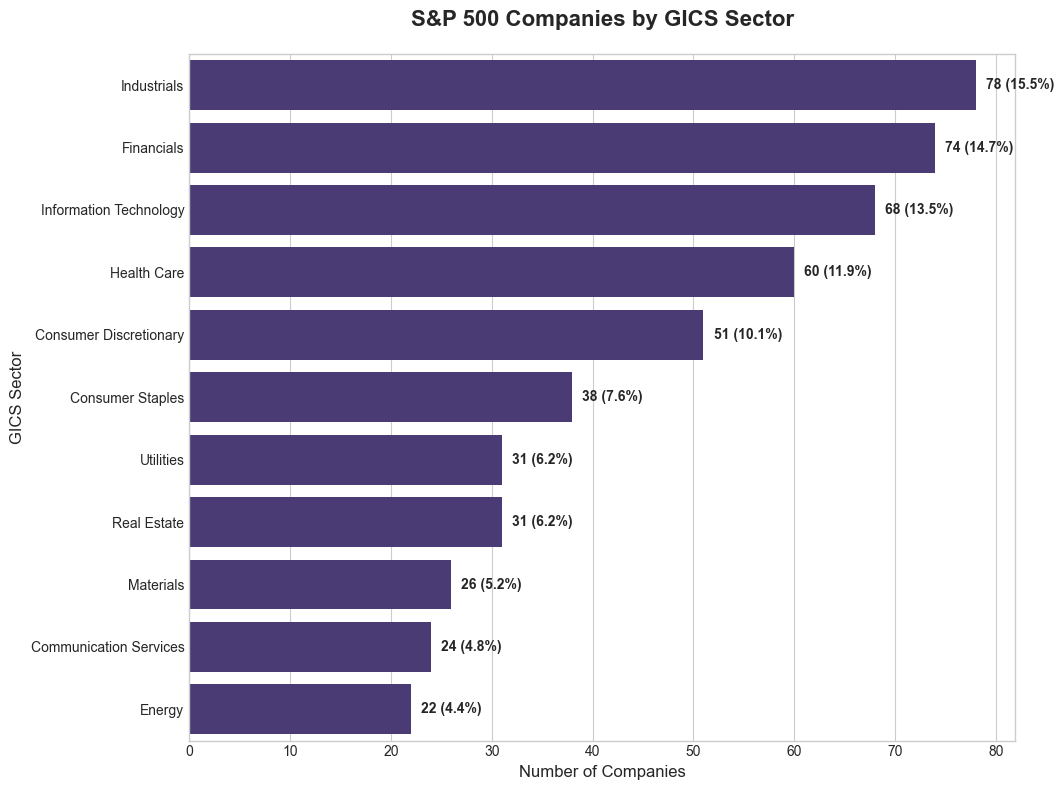

In [11]:
# --- ANALAYZE AND VISUALIZE SECTOR DISTRIBUTION ---

import matplotlib.pyplot as plt     # import matplotlib; library for creating static, animated, and interactive visualizations in Python.
# customizable plotting tool that generates graphs, charts,and plots

import seaborn as sns   # data visualization library built on top of Matplotlib
# purpose is to make creating appealing and informative statistical graphics easier

# --- SETTING THE STYLE OF THE PLOT ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# --- GENERATE A PLOT FOR THE "GICS SECTOR" COLUMN WITH DIMENSIONS (12, 8) ---
def analyze_sector_distribution(df, column="gics_sector", figsize=(12, 8)):

    # Analyze and visualize sector distribution with counts and percentages.
    
    # Parameters:
    # df: DataFrame containing the data
    # column: Column name to analyze (default: 'GICS Sector')
    # figsize: Figure size tuple (default: (12, 8))

    sector_counts = df[column].value_counts()   # calculates the count for each unique value in the column
    # the result is a Panda Series, where the index=entry and value=its count
    sector_percentages = df[column].value_counts(normalize=True) * 100  # similar to value.counts() but normalizez=True 
    # makes it return the frequences of each unique value as porportions (percentages if multiplied by 100)
    # GIVES THE PERCENTAGE OF COMPANIES BELONGING TO EACH SECTOR

    # create a new DataFrame for count and percentage; will have two columns
    sector_summary = pd.DataFrame({
        'Count': sector_counts,
        'Percentage': sector_percentages.round(2)  # rounds percentage to 2 decimal places
    })

    print("GICS Sector Distribution:")
    print("=" * 40)  # this prints 40 equal signs in a row; used for readability, highlighting, and formatting
    print(sector_summary)

    # creating the visualization
    fig, ax = plt.subplots(figsize=figsize)

    # plt.subplots() cretes a figure and a set of subplots in a single call; more concise/convenient over plt.figure()
    # figsize=figsize is the argument passed
    # fig is the Matplotlib Figure object
    # ax will be a single Matplotlib Axes object


    # use barplot instead of countplot for better control
    bars = sns.barplot(
        y=sector_counts.index,
        x=sector_counts.values,
        ax=ax,
        orient='h'  # horizontal orientation
    )

    # add value labels on bars
    for i, bar in enumerate(bars.patches):  
        # each bar is referred to as a "patch"
        # enumerate takes an iterable and returns an iterator that yields pairs of index, value
        
        width = bar.get_width() # since this is a horizontal graph the width will be the count of companies (value)
        percentage = sector_percentages.iloc[i] #i.loc[i] is a Panda Series method for integer-location bassed indexing
        # this fetches the percentage value corresponding to the current bar

        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
        # ax.text() adds text to the Axes object; it takes the x and y coordinates
        # width + 1, determines the horizontal position of the text, +1 is a small offset for the text
        # bar.get_y() returns the y-coordinate of the bottom edge of the bar
        # calculates half the height of the bar

                f'{int(width)} ({percentage:.1f}%)', # this is a f-string to embed expressions inside string literals
                # (int(width)): inserts the count (width of the bar)
                # (percentage:.1f): inserts the percentage, formatted to one decimal place (.1f)

                ha='left', va='center', fontweight='bold')
                # ha='left' (horizontal alignment): left aligning text relative to its x-coordinate
                # va='center' (vertical alignment): text should be vertically centered relative to its y-coordinate
        

        
     # Customize the plot
    ax.set_title('S&P 500 Companies by GICS Sector', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Number of Companies', fontsize=12)
    ax.set_ylabel('GICS Sector', fontsize=12)
    
    # adjust layout and add some padding
    plt.tight_layout() 
    plt.subplots_adjust(right=0.85)  # make room for percentage labels

    plt.show()
    
    return sector_summary

# ssage - call the function
sector_data = analyze_sector_distribution(df)
    
        

Top 10 States by S&P 500 Headquarters:
                    Count  Percentage  Cumulative %
headquarters_state                                 
California             70       13.92         13.92
New York               55       10.93         24.85
Texas                  47        9.34         34.19
Illinois               32        6.36         40.56
Massachusetts          23        4.57         45.13
Ohio                   20        3.98         49.11
Florida                17        3.38         52.49
Georgia                17        3.38         55.86
Pennsylvania           17        3.38         59.24
Virginia               15        2.98         62.23

Top 10 states represent 62.2% of all S&P 500 companies


C:\Users\malay\AppData\Local\Temp\ipykernel_3752\32278429.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


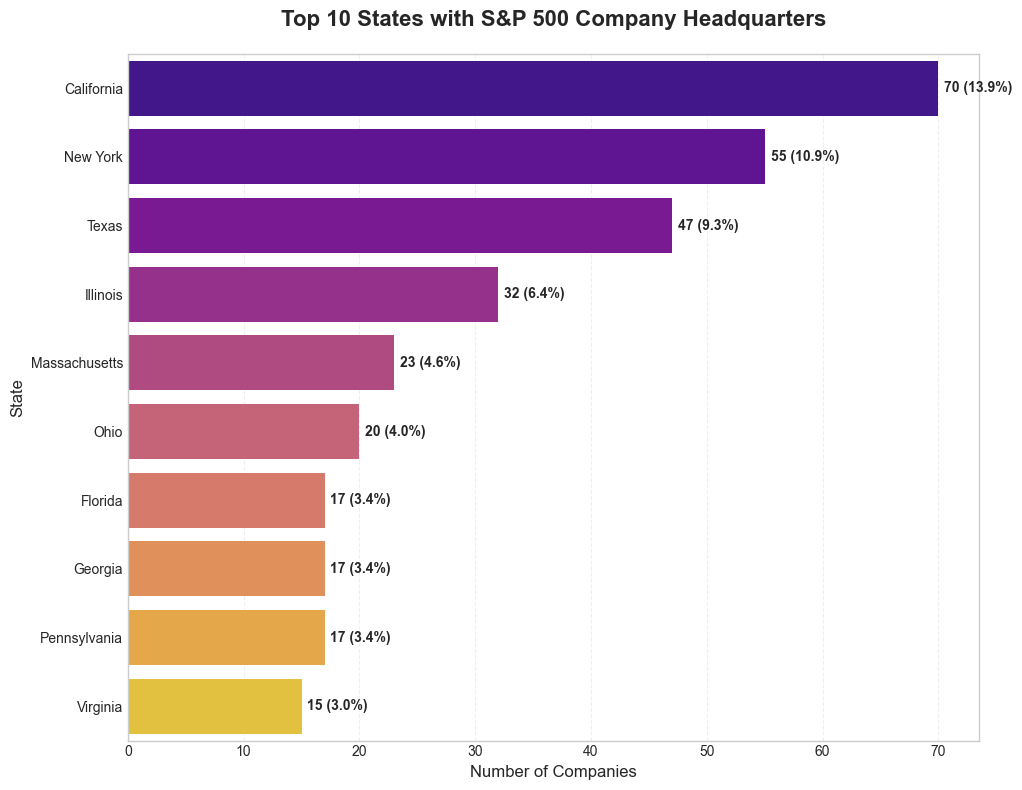


Geographic Concentration Analysis:
Top 10 states: 313 companies (62.2%)
Other states: 190 companies (37.8%)
Total unique states: 46


In [ ]:
# ANALYZE AND VISUALIZE STATE HEADQUARTERS DISTRIBUTION

def analyze_state_distribution(df, column='headquarters_state', top_n=10, figsize=(12, 8)):
    # Analyze and visualize state headquarters distribution with counts and percentages.
    
    # Parameters:
    # df: DataFrame containing the data
    # column: Column name to analyze (default: 'headquarters_state')
    # top_n: Number of top states to display (default: 10)
    # figsize: Figure size tuple (default: (12, 8))
    
    # Returns:
    # DataFrame with state counts and percentages
    
    # calculate counts and percentages for all states
    state_counts = df[column].value_counts()
    state_percentages = df[column].value_counts(normalize=True) * 100
    
    # Get top N states
    top_states = state_counts.head(top_n)
    top_percentages = state_percentages.head(top_n)
    
    # Create summary DataFrame
    state_summary = pd.DataFrame({
        'Count': top_states,
        'Percentage': top_percentages.round(2),
        'Cumulative %': top_percentages.cumsum().round(2)
    })
    
    print(f"Top {top_n} States by S&P 500 Headquarters:")
    print("=" * 50)
    print(state_summary)
    print(f"\nTop {top_n} states represent {state_summary['Cumulative %'].iloc[-1]:.1f}% of all S&P 500 companies") 
    # this acccesses the state_summary dataframe and pulls the Cumulative % column from it; .iloc[i] retrieve the value from the last row of the Series
    # the last element represents the total cumulative percentage 

    # :.1f: This is a format specifier applied within the f-string placeholder.
    # :  : Separates the expression from the format specifier.
    # .1 : rounds to one decimal place.
    # f  : formats the number as a fixed-point number (a float).


    # create the visualization
    fig, ax = plt.subplots(figsize=figsize)
    
    # create horizontal bar plot
    bars = sns.barplot(
        x=top_states.values,
        y=top_states.index,
        palette='plasma', # this is a colormap for the bars
        ax=ax
    )
    
    # add value labels on bars
    for i, bar in enumerate(bars.patches):
        width = bar.get_width()
        percentage = top_percentages.iloc[i]
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percentage:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=10)
    
    # customize the plot
    ax.set_title(f'Top {top_n} States with S&P 500 Company Headquarters', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Number of Companies', fontsize=12)
    ax.set_ylabel('State', fontsize=12)
    
    # add subtle grid for better readability
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    # alpha controls the transparency of the grid lines
    
    # adjust layout
    plt.tight_layout()
    plt.subplots_adjust(right=0.82)  # makes room for percentage labels
    
    plt.show()
    
    return state_summary

# usage - call the function
state_data = analyze_state_distribution(df)

# --- CONCENTRATION ANALYSIS; SHOWING HOW CONCENTRATED S&P 500 COMPANIES ARE GEOGRAPHICALLY ---
def show_geographic_concentration(df, column='headquarters_state', top_n=10):
    total_companies = len(df)
    top_states_count = df[column].value_counts().head(top_n).sum()
    others_count = total_companies - top_states_count
    others_percentage = (others_count / total_companies) * 100
    
    print(f"\nGeographic Concentration Analysis:")
    print("=" * 40)
    print(f"Top {top_n} states: {top_states_count} companies ({(top_states_count/total_companies)*100:.1f}%)")
    print(f"Other states: {others_count} companies ({others_percentage:.1f}%)")
    print(f"Total unique states: {df[column].nunique()}")

# call the concentration analysis
show_geographic_concentration(df)


Number of unique GICS Sub-Industries: 129

Top 10 GICS Sub-Industries:
gics_sub_industry
Health Care Equipment                           17
Electric Utilities                              15
Semiconductors                                  14
Industrial Machinery & Supplies & Components    14
Application Software                            13
Packaged Foods & Meats                          12
Multi-Utilities                                 12
Aerospace & Defense                             12
Asset Management & Custody Banks                11
Financial Exchanges & Data                      10
Name: count, dtype: int64


C:\Users\malay\AppData\Local\Temp\ipykernel_3752\1058640071.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subindustry_counts.values, y=subindustry_counts.index, palette='magma')


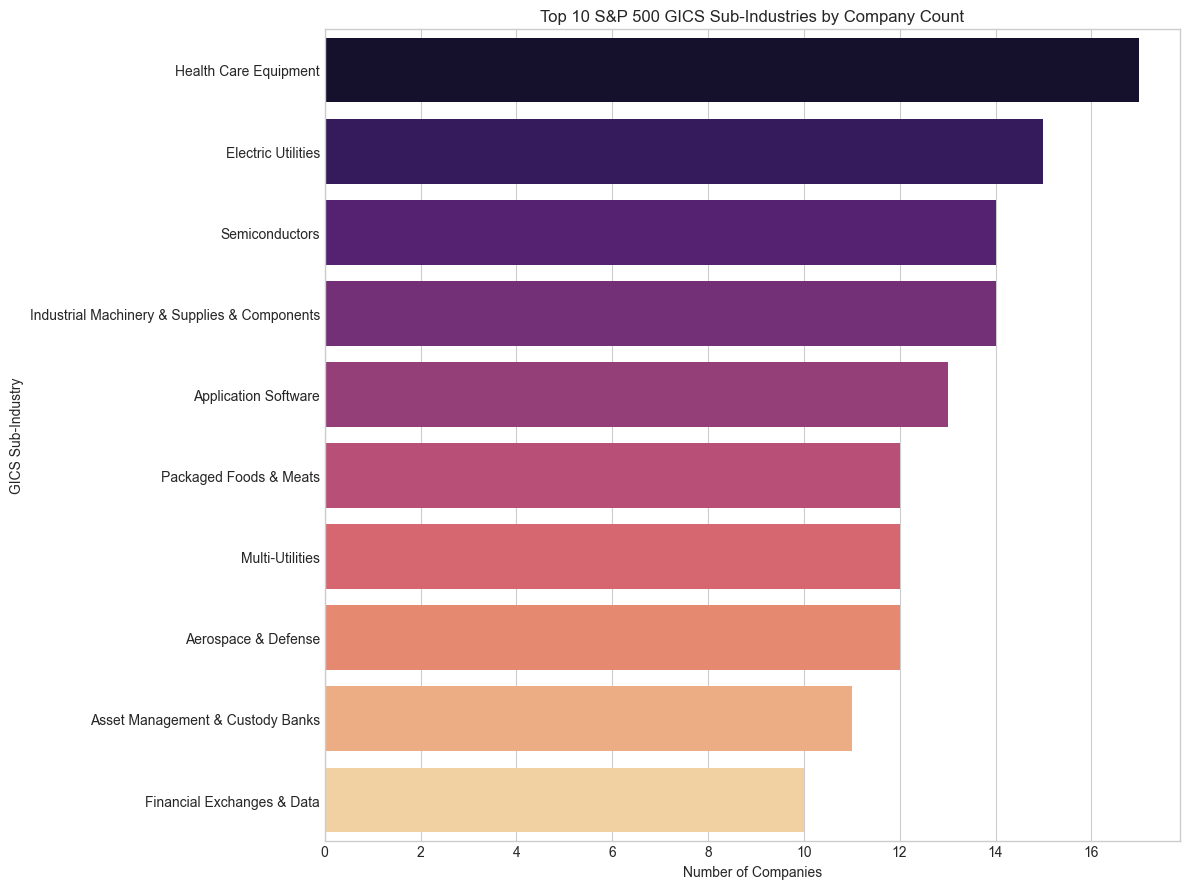

In [ ]:
# Count unique sub-industries
num_unique_subindustries = df['gics_sub_industry'].nunique()    # counts the number of unique (distinct) elements
print(f"\nNumber of unique GICS Sub-Industries: {num_unique_subindustries}")

# top 10 sub-industries
subindustry_counts = df['gics_sub_industry'].value_counts().head(10)
print("\nTop 10 GICS Sub-Industries:")
print(subindustry_counts)

# visualize Top 10 Sub-Industries
plt.figure(figsize=(12, 9))
sns.barplot(x=subindustry_counts.values, y=subindustry_counts.index, palette='magma')
plt.title('Top 10 S&P 500 GICS Sub-Industries by Company Count')
plt.xlabel('Number of Companies')
plt.ylabel('GICS Sub-Industry')
plt.tight_layout()
plt.show()

Total unique GICS Sub-Industries in S&P 500: 129
Top 10 GICS Sub-Industries:
                                              Count  Percentage  Cumulative %
gics_sub_industry                                                            
Health Care Equipment                            17        3.38          3.38
Electric Utilities                               15        2.98          6.36
Semiconductors                                   14        2.78          9.15
Industrial Machinery & Supplies & Components     14        2.78         11.93
Application Software                             13        2.58         14.51
Packaged Foods & Meats                           12        2.39         16.90
Multi-Utilities                                  12        2.39         19.28
Aerospace & Defense                              12        2.39         21.67
Asset Management & Custody Banks                 11        2.19         23.86
Financial Exchanges & Data                       10        1.99  

C:\Users\malay\AppData\Local\Temp\ipykernel_3752\4006901046.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


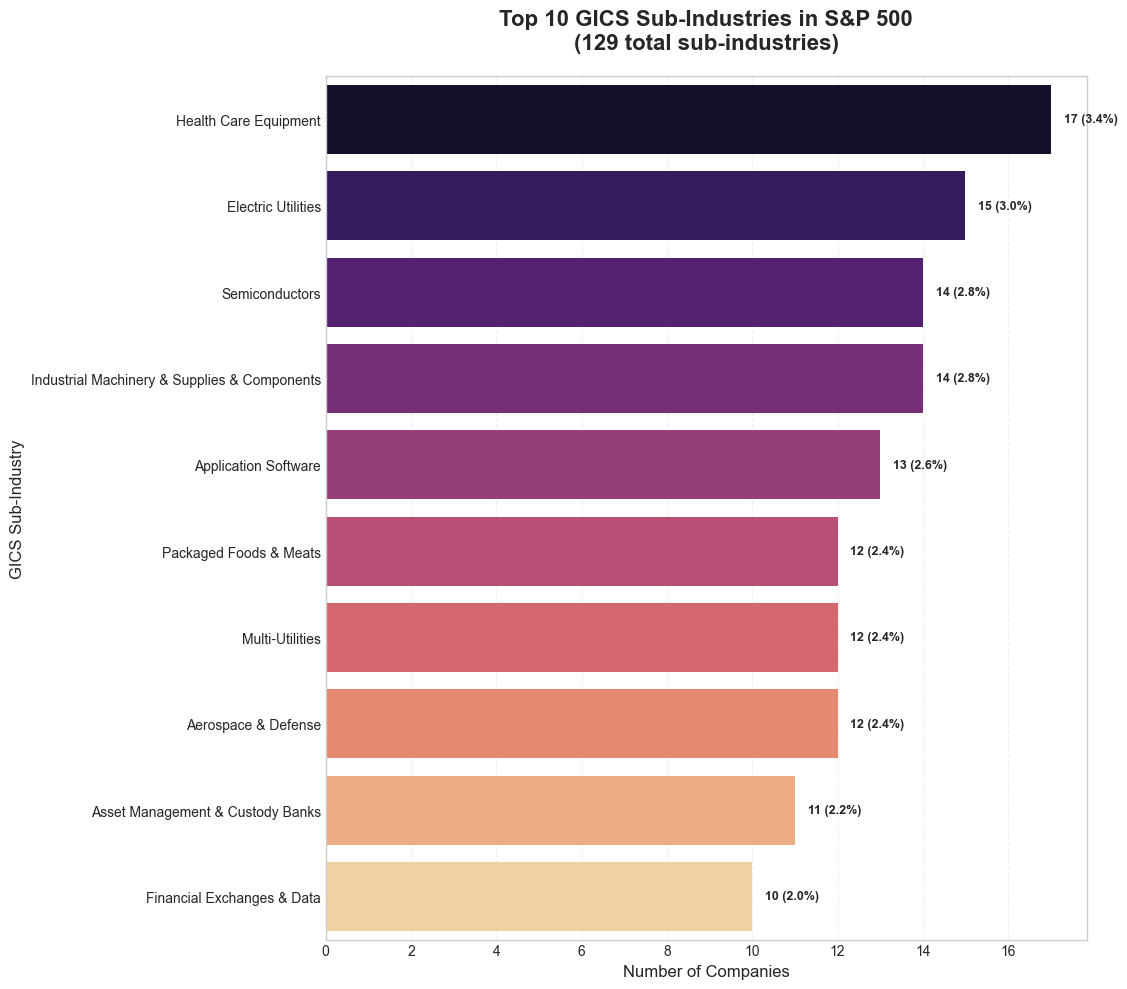


Sub-Industry Diversity by Sector:
Consumer Discretionary: 20 sub-industries
Industrials: 20 sub-industries
Financials: 13 sub-industries
Real Estate: 13 sub-industries
Consumer Staples: 12 sub-industries
Information Technology: 12 sub-industries
Materials: 10 sub-industries
Health Care: 10 sub-industries
Communication Services: 9 sub-industries
Energy: 5 sub-industries
Utilities: 5 sub-industries


In [14]:
# --- ANALYZE AND VISUALIZE GICS SUB-INDUSTRY DISTRIBUTION ---

def analyze_subindustry_distribution(df, column='gics_sub_industry', top_n=10, figsize=(14, 10)):

    # Analyze and visualize GICS sub-industry distribution with counts and percentages.
    
    # Parameters:
    # df: DataFrame containing the data
    # column: Column name to analyze (default: 'GICS Sub-Industry')
    # top_n: Number of top sub-industries to display (default: 15)
    # figsize: Figure size tuple (default: (14, 10))
    
    # Returns:
    # DataFrame with sub-industry counts and percentages
    
    
    # get total number of unique sub-industries
    total_unique = df[column].nunique()
    print(f"Total unique GICS Sub-Industries in S&P 500: {total_unique}")
    print("=" * 60)
    
    # calculating counts and percentages
    subindustry_counts = df[column].value_counts()
    subindustry_percentages = df[column].value_counts(normalize=True) * 100     # gets a porportion and turns it into a percentage
    
    # get top N sub-industries
    top_subindustries = subindustry_counts.head(top_n)
    top_percentages = subindustry_percentages.head(top_n)
    
    # create summary DataFrame
    subindustry_summary = pd.DataFrame({
        'Count': top_subindustries,
        'Percentage': top_percentages.round(2),
        'Cumulative %': top_percentages.cumsum().round(2)
    })
    
    print(f"Top {top_n} GICS Sub-Industries:")
    print(subindustry_summary)
    
    # show diversity statistics
    companies_in_top = top_subindustries.sum()
    companies_in_others = len(df) - companies_in_top
    print(f"\nDiversity Analysis:")
    print(f"Top {top_n} sub-industries: {companies_in_top} companies ({(companies_in_top/len(df))*100:.1f}%)")
    print(f"Other {total_unique - top_n} sub-industries: {companies_in_others} companies ({(companies_in_others/len(df))*100:.1f}%)")
    
    # create the visualization
    fig, ax = plt.subplots(figsize=figsize)
    
    # create horizontal bar plot
    bars = sns.barplot(
        x=top_subindustries.values,
        y=top_subindustries.index,
        palette='magma',
        ax=ax
    )
    
    # add value labels on bars
    for i, bar in enumerate(bars.patches):
        width = bar.get_width()
        percentage = top_percentages.iloc[i]
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percentage:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=9)
    
    # customizing the plot
    ax.set_title(f'Top {top_n} GICS Sub-Industries in S&P 500\n({total_unique} total sub-industries)', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Number of Companies', fontsize=12)
    ax.set_ylabel('GICS Sub-Industry', fontsize=12)
    
    # add subtle grid for better readability
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # adjusting layout to accommodate long sub-industry names
    plt.tight_layout()
    plt.subplots_adjust(right=0.78)  # More room for percentage labels
    
    plt.show()
    
    return subindustry_summary

# usage - call the function
subindustry_data = analyze_subindustry_distribution(df)

# --- ANALYZE SUB-INDUSTRY DIVERSITY WITHIN SECTORS; SHOWS HOW MANY SUB-INDUSTRIES EXIST WITHIN EACH SECTOR ---
def analyze_sector_subindustry_diversity(df, sector_col='gics_sector', subindustry_col='gics_sub_industry'):
    
    sector_diversity = df.groupby(sector_col)[subindustry_col].nunique().sort_values(ascending=False)
    
    print(f"\nSub-Industry Diversity by Sector:")
    print("=" * 40)
    for sector, count in sector_diversity.items():
        print(f"{sector}: {count} sub-industries")
    
    return sector_diversity

# call the diversity analysis
sector_diversity = analyze_sector_subindustry_diversity(df)